<a href="https://colab.research.google.com/github/abhi-11nav/Car-price-prediction/blob/main/Car_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

# Dataset Credits

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
url = "https://raw.githubusercontent.com/abhi-11nav/Car-price-prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv.xls"

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
dataset["name"].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [7]:
# Since the "name" feature does not add much value to the output and consists of moslty unique values, we eliminate the feature

dataset.drop("name",axis=1,inplace=True)

In [8]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
# Inspecting the dataset for missing values

dataset.isna().any()

year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

There are no missing values in the dataset

In [10]:
# Printing the number of values in categorical columns

for x in dataset.columns:
  if type(dataset[x][0]) != np.int64:
    print(dataset[x].value_counts(),"\n")

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64 

Manual       3892
Automatic     448
Name: transmission, dtype: int64 

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64 



In [11]:
# Since we do not have much data on electric cars, we eliminate the electric car from the dataset

dataset.drop(dataset.index[dataset['fuel']=="Electric"],inplace=True)

In [12]:
# Verifying if the specified category of the feature has been eliminated

dataset["fuel"].value_counts()

Diesel    2153
Petrol    2123
CNG         40
LPG         23
Name: fuel, dtype: int64

We can see that "Electric" category has been dropped from the feature

# Exploratory Data Analysis

In [13]:
# Importing visualizatin libraries

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


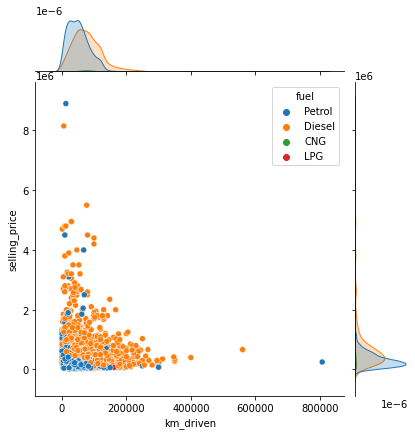

In [14]:
sns.jointplot(dataset['km_driven'],dataset['selling_price'],hue=dataset["fuel"])

### Observation :

We can notice that diesel vehicles have a bit higher selling price when compare to vehicles with fuel type as petrol given that kilometers driven is under 30000 km (approximate value). Although, we cannot say much about CNG and LPG fuel types as the available data is low and also cannot comment about all the fuel types after 400000 kms range.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


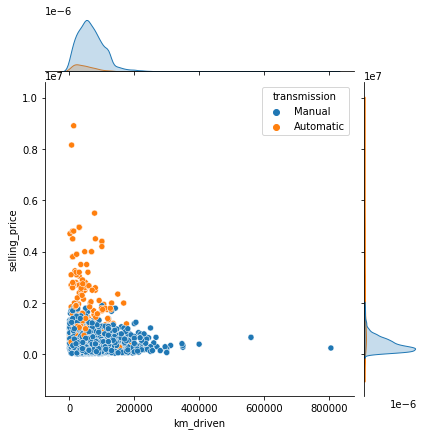

In [15]:
sns.jointplot(dataset['km_driven'],dataset['selling_price'],hue=dataset["transmission"])

### Observation:

We can see that automatic cars have a higher selling price under 20000 kilometers drive range when compared to the manual transmission cars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


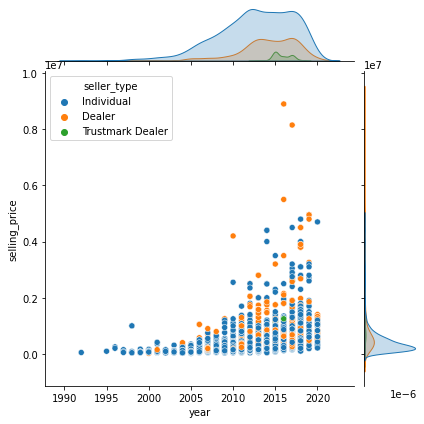

In [16]:
sns.jointplot(dataset['year'],dataset['selling_price'],hue=dataset["seller_type"])

### Observation:

The main takeaway is that the selling price is going up with time. We can see that the selling price is increasing year by year irrespective of the seller type. Although we cannot see much of a difference between individual seller and dealers, we can note that dealers selling cars has increased substantially over the years.

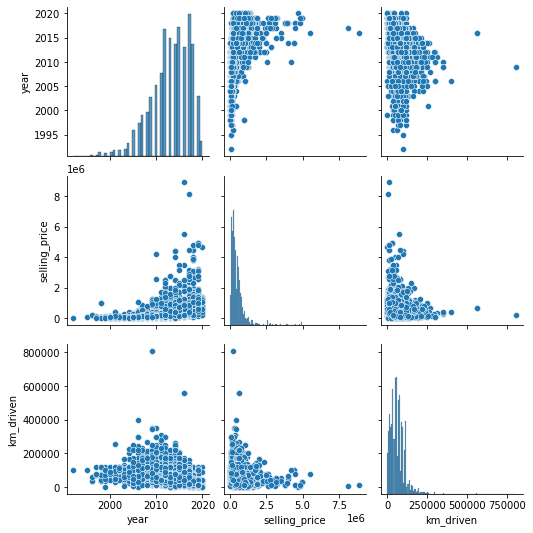

In [17]:
sns.pairplot(dataset)

We can have a look at the distribution of numerical data after normalizing the dataset

# ENCODING CATEGORICAL VARIABLES

In [18]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


There are threee categorical variables. So we have to convert them into numerical variables in order to proceed further with the dataset

In [19]:
dataset["owner"].value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [20]:
# Ordinal encoding for owner as the order is meaningful

owner_dict = {
    "First Owner" : 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner":4,
    "Test Drive Car": 5
}

dataset["owner_ordinal"] = dataset['owner'].map(owner_dict)

In [21]:
# Verifying that ordinal encoding is done for "owner" feature

dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,owner_ordinal
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,1
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,1
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,1
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


In [22]:
# Dropping the "owner" feature as it is already encoded
dataset.drop("owner",inplace=True,axis=1)

In [23]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [24]:
# Binary encoding for other categorical variables usking sklearn

import sklearn 
import category_encoders as encoder

encoder = encoder.BinaryEncoder()

encoded_data = encoder.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
encoded_data

,year,selling_price,km_driven,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,transmission_0,transmission_1,owner_ordinal
0,2007,60000,70000,0,0,1,0,1,0,1,1
1,2007,135000,50000,0,0,1,0,1,0,1,1
2,2012,600000,100000,0,1,0,0,1,0,1,1
3,2017,250000,46000,0,0,1,0,1,0,1,1
4,2014,450000,141000,0,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,1,0,1,2
4336,2014,409999,80000,0,1,0,0,1,0,1,2
4337,2009,110000,83000,0,0,1,0,1,0,1,2
4338,2016,865000,90000,0,1,0,0,1,0,1,1


In [26]:
# Combining the encoded columns

encoded_data['fuel'] = encoded_data["fuel_0"]+encoded_data["fuel_1"]+encoded_data["fuel_2"]

encoded_data['transmission']=encoded_data['transmission_0']+encoded_data['transmission_1']

encoded_data['seller_type'] =encoded_data['seller_type_0']+encoded_data['seller_type_1'] 

In [27]:
encoded_data.drop(["fuel","seller_type","transmission"],inplace=True,axis=1)

# That was a bad idea

In [28]:
"""for x in dataset.columns:
  if type(dataset[x][0]) == str:
    for y in dataset[x].value_counts().index:
      print(dataset.index[dataset[x]==y][0],"corresponding to", encoded_data.index[dataset[x]==y][0])"""

'for x in dataset.columns:\n  if type(dataset[x][0]) == str:\n    for y in dataset[x].value_counts().index:\n      print(dataset.index[dataset[x]==y][0],"corresponding to", encoded_data.index[dataset[x]==y][0])'

## Note corresponding encodings

#### Fuel_type
Petrol = 001,
Diesel = 010,
CNG == 011,
LPG == 100

#### Seller_type

Individual == 01,
Dealer == 10,
Trustmark Dealer == 11

#### Transmission
Manual == 01,
Automatic == 10

In [31]:
encoded_data.head()

,year,selling_price,km_driven,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,transmission_0,transmission_1,owner_ordinal
0,2007,60000,70000,0,0,1,0,1,0,1,1
1,2007,135000,50000,0,0,1,0,1,0,1,1
2,2012,600000,100000,0,1,0,0,1,0,1,1
3,2017,250000,46000,0,0,1,0,1,0,1,1
4,2014,450000,141000,0,1,0,0,1,0,1,2


In [34]:
# Now that we have encoded data. It is time for scaling the data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(encoded_data),columns=encoded_data.columns)

In [35]:
df.head()

,year,selling_price,km_driven,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,transmission_0,transmission_1,owner_ordinal
0,-1.445767,-0.767745,0.081109,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
1,-1.445767,-0.638108,-0.347670,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
2,-0.259237,0.165637,0.724278,-0.073,0.989226,-0.997008,-0.580987,0.544768,-0.338897,0.338897,-0.630118
3,0.927293,-0.439333,-0.433426,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
4,0.215375,-0.093636,1.603275,-0.073,0.989226,-0.997008,-0.580987,0.544768,-0.338897,0.338897,0.720712


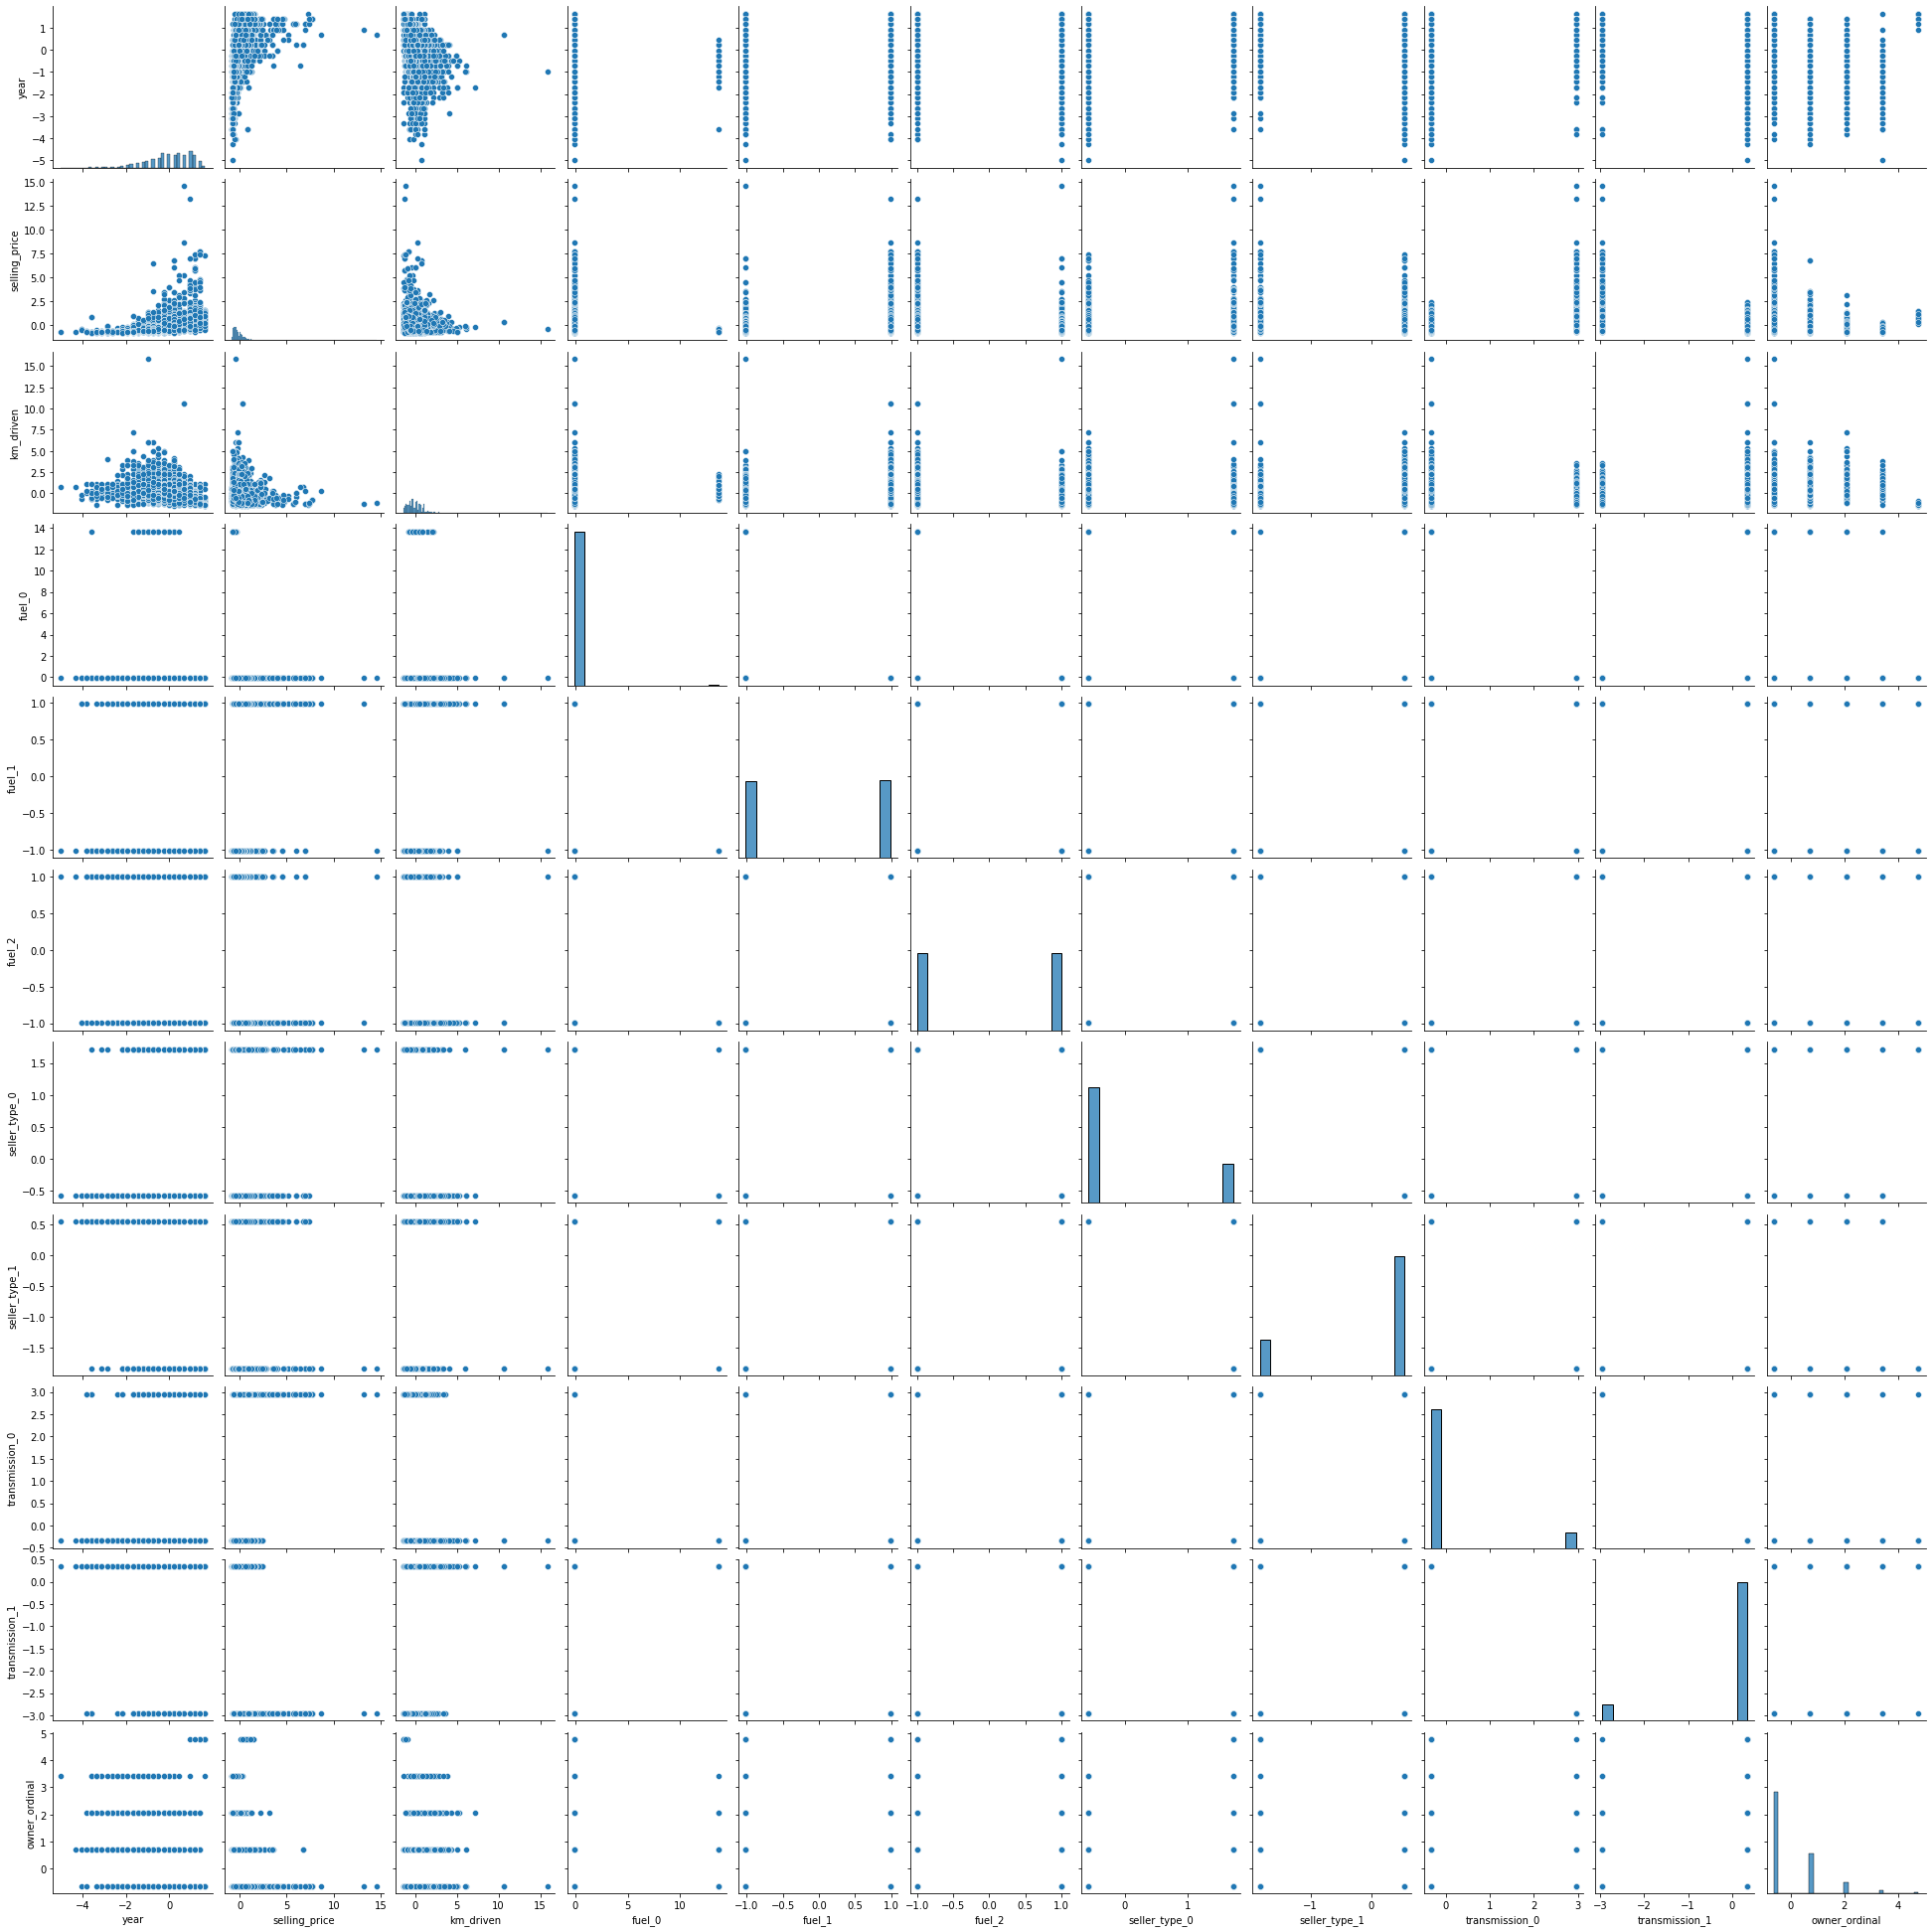

In [37]:
# Now let us check for the distributions of the data again. 

sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'km_driven')

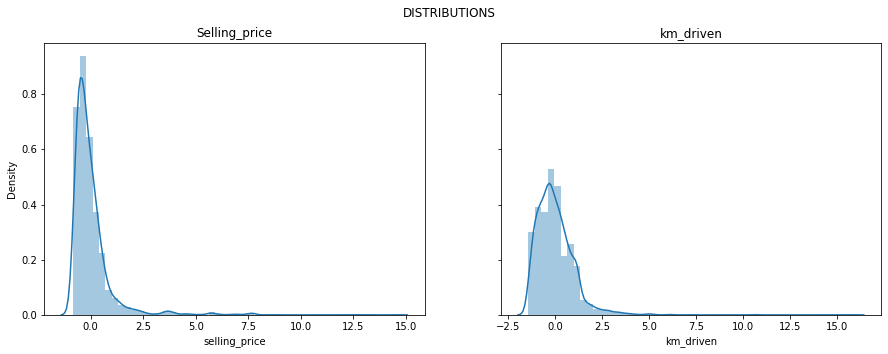

In [59]:
# We are going to plot the distributions of kms_driven and selling_price seperately for further analysis 

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("DISTRIBUTIONS")

sns.distplot(df["selling_price"],ax=axes[0])
axes[0].set_title("Selling_price")

sns.distplot(df["km_driven"],ax=axes[1])
axes[1].set_title("km_driven")

In [44]:
for x in df.columns:
  print(df[x].max()," is the max value of",x,"\n",df[x].min()," is the min value of ",x,"\n\n")

1.6392105665244587  is the max value of year 
 -5.005356701198434  is the min value of  year 


14.512065066177637  is the max value of selling_price 
 -0.8368842671795101  is the min value of  selling_price 


15.873023882254024  is the max value of km_driven 
 -1.4195966532064233  is the min value of  km_driven 


13.698619416315042  is the max value of fuel_0 
 -0.07300005713050185  is the min value of  fuel_0 


0.9892260466923767  is the max value of fuel_1 
 -1.0108912956180718  is the min value of  fuel_1 


1.0030005837778533  is the max value of fuel_2 
 -0.9970083927902099  is the min value of  fuel_2 


1.721208028573412  is the max value of seller_type_0 
 -0.5809872969444777  is the min value of  seller_type_0 


0.5447680840426615  is the max value of seller_type_1 
 -1.8356435138033687  is the min value of  seller_type_1 


2.9507516200186195  is the max value of transmission_0 
 -0.33889670456020626  is the min value of  transmission_0 


0.3388967045602062  is the max 

Let us check for outliers in our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


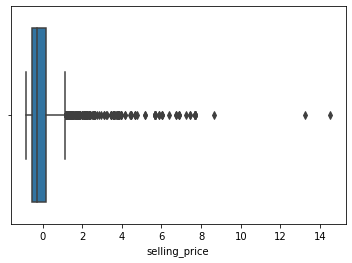

In [60]:
sns.boxplot(df["selling_price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


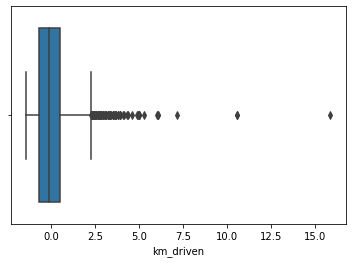

In [61]:
sns.boxplot(df["km_driven"])

### Observati0n:

The box plot shows that there are outliers present in the features "km_driven" and "selling_price"

In [64]:
# Outlier detection and elimination 

outliers = []

# Defining a function to detect outliers 

def outlier_detector(data,cols):
  
  threshold = 3
  mean = np.mean(data[cols])
  std = np.std(data[cols])

  for x in data[cols]:
    z_score = (x-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(x)

  for o in outliers:
    data.drop(data.index[data[cols]==o],inplace=True)

  shape = data.shape

  return shape

In [65]:
for cols in df.columns:
  outlier_detector(df,cols)

In [69]:
print("Actual shape :",encoded_data.shape,"\n\n","Shape after eliminating outliers : ",df.shape)

Actual shape : (4339, 11) 

 Shape after eliminating outliers :  (3697, 11)


We can see that the outliers have been removed and the shape of the data has been reduced. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'km_driven')

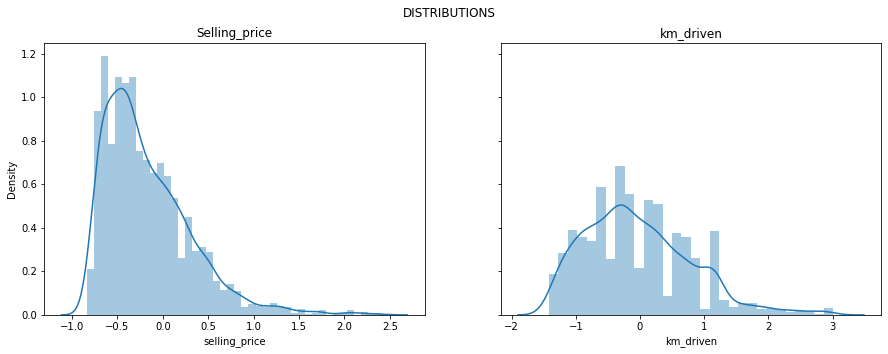

In [70]:
# Plotting the new distributions

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("DISTRIBUTIONS")

sns.distplot(df["selling_price"],ax=axes[0])
axes[0].set_title("Selling_price")

sns.distplot(df["km_driven"],ax=axes[1])
axes[1].set_title("km_driven")

### Obsevation:

We can see that the data is normally distributed now compared to the previous plottings. Although it is not perfectly normal, we can see that most of the data falls between a particular range which makes it easier for the neural net to learn as it is not shift/scale invariant. 

In [71]:
df.head()

,year,selling_price,km_driven,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,transmission_0,transmission_1,owner_ordinal
0,-1.445767,-0.767745,0.081109,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
1,-1.445767,-0.638108,-0.347670,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
2,-0.259237,0.165637,0.724278,-0.073,0.989226,-0.997008,-0.580987,0.544768,-0.338897,0.338897,-0.630118
3,0.927293,-0.439333,-0.433426,-0.073,-1.010891,1.003001,-0.580987,0.544768,-0.338897,0.338897,-0.630118
4,0.215375,-0.093636,1.603275,-0.073,0.989226,-0.997008,-0.580987,0.544768,-0.338897,0.338897,0.720712


# DEEP LEARNING ALGORITHM - ARTIFICIAL NEURAL NETWORK

In [73]:
# Seperating the features and the labels 

X = df.drop("selling_price",axis=1)

y = df["selling_price"]

In [77]:
# Verifying the splits 

print("Features shape",X.shape,"|| Labels shape",y.shape)

Features shape (3697, 10) || Labels shape (3697,)


That verifies the split. 

In [80]:
# Importing libraries for aritficial neural network 

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model, Sequential

# Improting libraries for Hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [104]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X.shape[1:]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(1)
    ])

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 300)               3300      
                                                                 
 dense_15 (Dense)            (None, 300)               90300     
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dense_17 (Dense)            (None, 1)                 301       
                                                                 
Total params: 184,201
Trainable params: 184,201
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])

In [115]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.25)

In [124]:
history = model.fit(train_X, train_y, epochs=50, validation_split=0.3)

Epoch 1/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0856 - accuracy: 0.0000e+00 - val_loss: 0.1189 - val_accuracy: 0.0000e+00
Epoch 2/50
61/61 [==============================] - 0s 6ms/step - loss: 0.0854 - accuracy: 0.0000e+00 - val_loss: 0.1204 - val_accuracy: 0.0000e+00
Epoch 3/50
61/61 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.0000e+00 - val_loss: 0.1183 - val_accuracy: 0.0000e+00
Epoch 4/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0855 - accuracy: 0.0000e+00 - val_loss: 0.1190 - val_accuracy: 0.0000e+00
Epoch 5/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0856 - accuracy: 0.0000e+00 - val_loss: 0.1187 - val_accuracy: 0.0000e+00
Epoch 6/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0854 - accuracy: 0.0000e+00 - val_loss: 0.1190 - val_accuracy: 0.0000e+00
Epoch 7/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0857 - accuracy: 0.0000e+00 - val_los

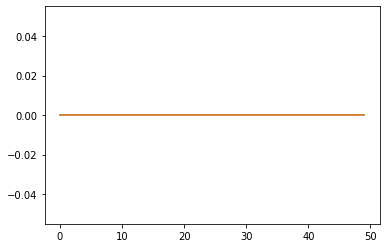

In [121]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [123]:
model.evaluate(test_X,test_y)

29/29 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.0000e+00


[0.10280729085206985, 0.0]